In [445]:
import pandas as pd

data = pd.read_csv("plant_database.csv")

print(data.head())


   indoor  outdoor preferredHumidity  \
0    True    False            18-27%   
1   False     True            21-30%   
2    True    False            16-26%   
3    True    False            13-23%   
4   False     True            18-35%   

                                    plantDescription     plantName  \
0  The Peace Lily is a popular indoor plant known...    Peace Lily   
1  Lavender is a fragrant herb with beautiful pur...      Lavender   
2  Spider plants are easy-to-care-for indoor plan...  Spider Plant   
3  The Snake Plant, also known as Mother-in-law's...   Snake Plant   
4  Sunflowers are tall, annual plants with large,...     Sunflower   

            scientificName  plantType  flowering averageLeafSize  \
0       Spathiphyllum spp.    Foliage       True          Medium   
1           Lavandula spp.       Herb       True           Small   
2     Chlorophytum comosum    Foliage       True          Medium   
3  Sansevieria trifasciata    Foliage       True          Medium  

In [446]:
columns_to_remove = ["scientificName", "outdoor", "plantType", "flowering", "averageLeafSize", 
                     "plantFamily", "plantLifespan", "averagePlantWidth"]

data = data.drop(columns_to_remove, axis=1)

print(data.head())

   indoor preferredHumidity  \
0    True            18-27%   
1   False            21-30%   
2    True            16-26%   
3    True            13-23%   
4   False            18-35%   

                                    plantDescription     plantName  \
0  The Peace Lily is a popular indoor plant known...    Peace Lily   
1  Lavender is a fragrant herb with beautiful pur...      Lavender   
2  Spider plants are easy-to-care-for indoor plan...  Spider Plant   
3  The Snake Plant, also known as Mother-in-law's...   Snake Plant   
4  Sunflowers are tall, annual plants with large,...     Sunflower   

  preferredTemperature preferredHumidity_inwords waterSchedule  \
0    18-24°C (65-75°F)                      High        Weekly   
1    21-27°C (70-80°F)           Low to moderate     Bi-weekly   
2    18-24°C (65-75°F)                  Moderate        Weekly   
3    16-24°C (60-75°F)                      High     Bi-weekly   
4    18-27°C (65-80°F)           Low to moderate        Weekly

In [447]:
import matplotlib.pyplot as plt

preferred_temp = data["preferredTemperature"]
preferred_humidity = data["preferredHumidity"]
water_schedule = data["waterSchedule"]
water_frequency = data["waterFrequency"]
water_quantity = data["waterQuantity"]
plant_names = data["plantName"]



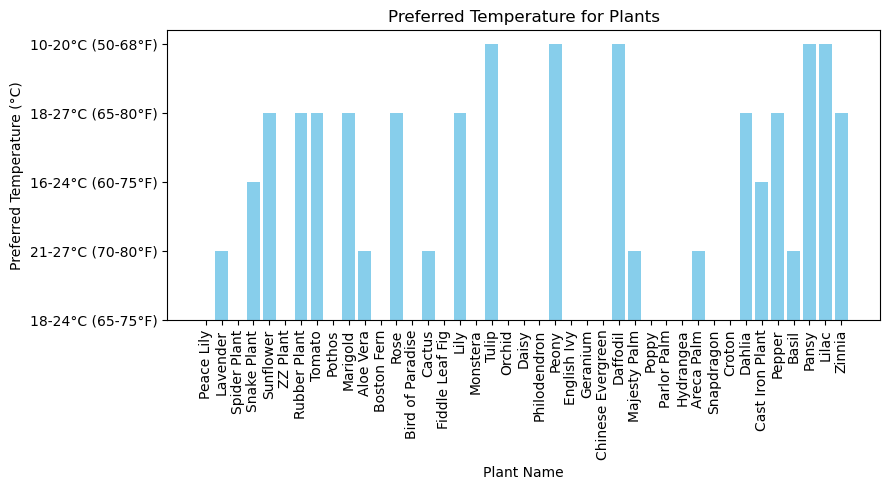

In [448]:
plt.figure(figsize=(9, 5))
plt.bar(plant_names, preferred_temp, color='skyblue')
plt.xlabel('Plant Name')
plt.ylabel('Preferred Temperature (°C)')
plt.title('Preferred Temperature for Plants')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

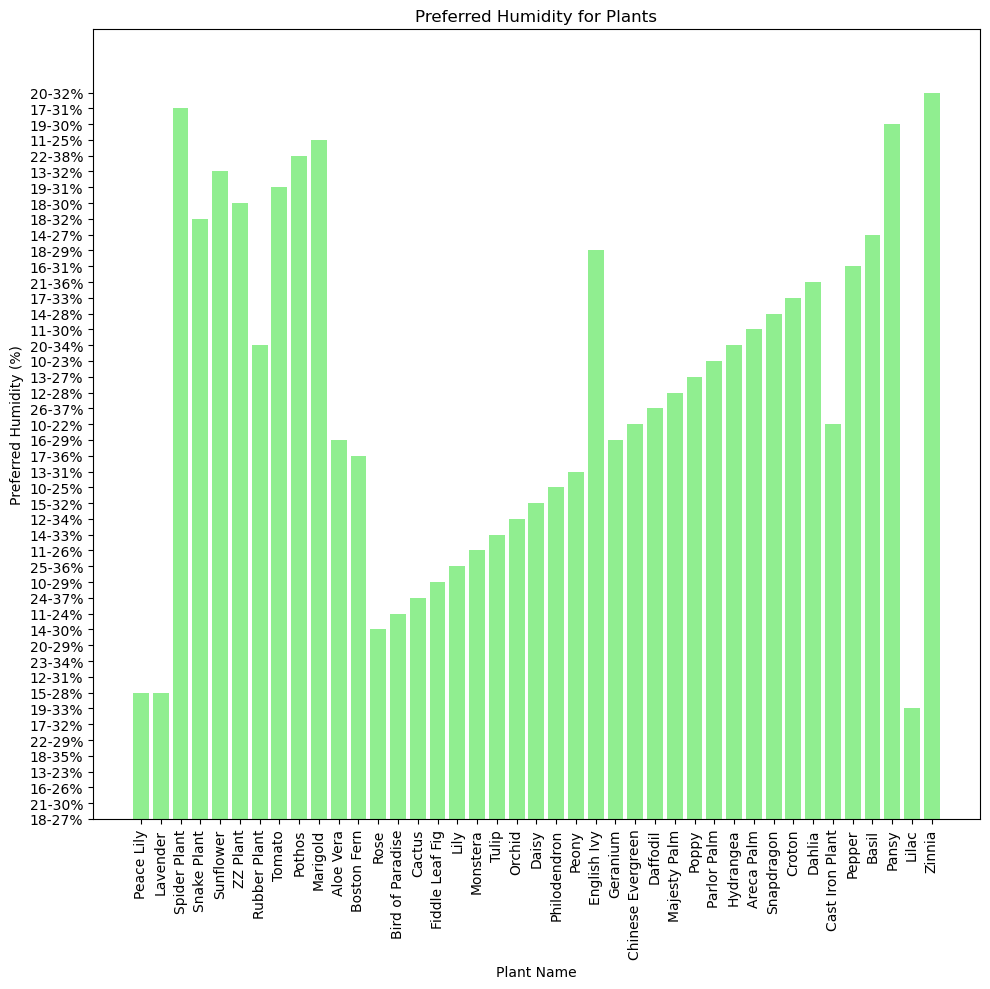

In [449]:
plt.figure(figsize=(10, 10))
plt.bar(plant_names, preferred_humidity, color='lightgreen')
plt.xlabel('Plant Name')
plt.ylabel('Preferred Humidity (%)')
plt.title('Preferred Humidity for Plants')
plt.xticks(rotation=90)
plt.ylim(0, 50)  
plt.tight_layout()
plt.show()


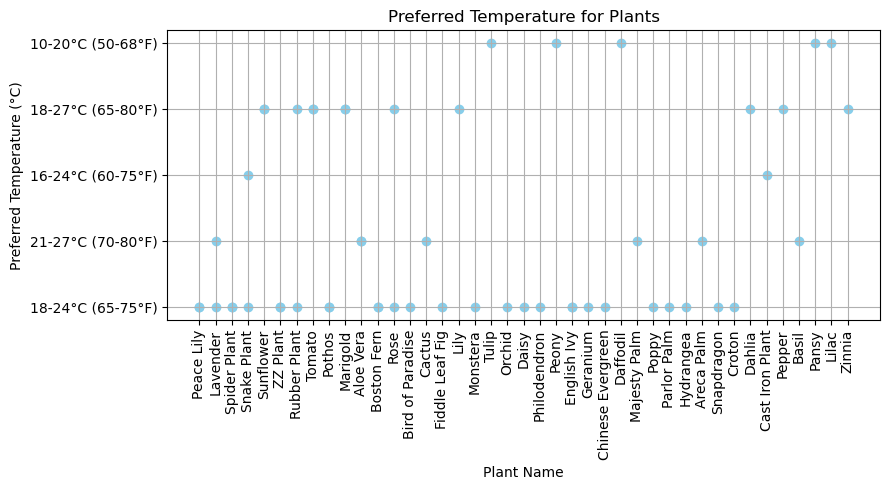

In [450]:
plt.figure(figsize=(9, 5))
plt.scatter(plant_names, preferred_temp, color='skyblue', marker='o')
plt.xlabel('Plant Name')
plt.ylabel('Preferred Temperature (°C)')
plt.title('Preferred Temperature for Plants')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True) 
plt.show()


In [451]:
import numpy as np
import random

def temperature_cold(temp):
  if temp < 20:
    return 1
  elif temp < 25:
    return (25 - temp) / 5
  else:
    return 0

def temperature_warm(temp):
  if temp < 20:
    return 0
  elif temp < 30:
    return (temp - 20) / 10
  else:
    return 1

def temperature_hot(temp):
  if temp < 30:
    return 0
  elif temp < 40:
    return (temp - 30) / 10
  else:
    return 1

def humidity_dry(humidity):
  if humidity < 40:
    return 1
  elif humidity < 55:
    return (55 - humidity) / 15
  else:
    return 0

def humidity_humid(humidity):
  if humidity < 40:
    return 0
  elif humidity < 70:
    return (humidity - 40) / 30
  else:
    return 1

hvac_temp_maintain = 0
hvac_increase_cool = 1
hvac_decrease_cool = -1

hvac_humidity_maintain = 0
hvac_increase_humidity = 1
hvac_decrease_humidity = -1

def fuzzy_rule(temp, humidity):
 cold_grade = temperature_cold(temp)
 warm_grade = temperature_warm(temp)
 hot_grade = temperature_hot(temp)
 dry_grade = humidity_dry(humidity)
 humid_grade = humidity_humid(humidity)

 if cold_grade > 0.5:
   return hvac_temp_maintain, hvac_humidity_maintain
 elif warm_grade > 0.5 and humid_grade > 0.5:
   return hvac_increase_cool, hvac_decrease_humidity 
 elif hot_grade > 0.5:
   return hvac_increase_cool, hvac_humidity_maintain
 elif dry_grade > 0.5:
   return hvac_temp_maintain, hvac_increase_humidity
 elif warm_grade > 0.5:
   return hvac_decrease_cool, hvac_humidity_maintain 
 else:
   return hvac_temp_maintain, hvac_humidity_maintain
 

In [452]:
import random
import pandas as pd

# Here we Define 6 HVAC actions
hvac_temp_maintain = "maintain temperature"
hvac_increase_cool = "reduce temperature"
hvac_decrease_cool = "increase temperature"
hvac_humidity_maintain = "maintain humidity"
hvac_increase_humidity = "increase humidity"
hvac_decrease_humidity = "decrease humidity"

def convert_temperature_range_to_numeric(preferred_temperature):
    temperatures = preferred_temperature.split(' ')[0].split('-')
    if len(temperatures) == 1:
        return int(temperatures[0].split('°')[0])
    else:
        return (int(temperatures[0].split('°')[0]) + int(temperatures[1].split('°')[0])) 
    
def humidity_range_to_average(percentage_range):
    start, end = percentage_range.split('-')
    start = int(start)
    end = int(end[:-1])
    average = (start + end) 
    return average 

# Random selection from sensor data
sensor_data = pd.read_csv("sensor_data.csv")
required_changes = []
accurate_changes = []
required_h_changes = []
accurate_h_changes = []
selected_plants = []
optimal_temperatures = []
optimal_humidities = []
sensor_temperatures = []
sensor_humidities = []

for _ in range(8):
    random_plant = sensor_data.sample(n=1)

    plant_name = random_plant.iloc[0]["plantName"]
    optimal_temp = data[data["plantName"] == plant_name]["preferredTemperature"].values[0]
    optimal_humidity = data[data["plantName"] == plant_name]["preferredHumidity"].values[0]

    temperature = random.randint(0, 50)
    humidity = random.randint(0, 70)

    selected_plants.append(plant_name)
    optimal_temperatures.append(convert_temperature_range_to_numeric(optimal_temp))
    optimal_humidities.append(humidity_range_to_average(optimal_humidity))
    sensor_temperatures.append(temperature)
    sensor_humidities.append(humidity)

    hvac_action_value = fuzzy_rule(temperature, humidity)

    print("Selected plant:", plant_name)
    print("Optimal Temperature:", convert_temperature_range_to_numeric(optimal_temp))
    print("Optimal Humidity:", humidity_range_to_average(optimal_humidity))
    print("Sensor Temperature:", temperature)
    print("Sensor Humidity:", humidity)
    required_temp_change = temperature - convert_temperature_range_to_numeric(optimal_temp)
    required_humidity_change = abs(humidity - int(humidity_range_to_average(optimal_humidity)))
    accurate_temp_change = abs(required_temp_change)
    accurate_humidity_change = abs(required_humidity_change)

    accurate_changes.append(accurate_temp_change)
    required_changes.append(required_temp_change)
    accurate_h_changes.append(accurate_humidity_change)
    required_h_changes.append(required_humidity_change)

    if temperature == convert_temperature_range_to_numeric(optimal_temp):
        print("Action: Maintain current temperature")
    elif temperature > convert_temperature_range_to_numeric(optimal_temp):
        print(f"Action: Reduce temperature by {accurate_temp_change}")
    elif temperature < convert_temperature_range_to_numeric(optimal_temp):
        print(f"Action: Increase temperature by {accurate_temp_change}")

    if humidity == humidity_range_to_average(optimal_humidity):
        print("Action: Maintain current humidity")
    elif humidity < humidity_range_to_average(optimal_humidity):
        print(f"Action: Increase humidity by {required_humidity_change}")
    elif humidity > humidity_range_to_average(optimal_humidity):
        print(f"Action: Decrease humidity by {required_humidity_change}")
    print()

print("Selected Plants:", selected_plants)
print("Sensor Temperatures:", sensor_temperatures)
print("Optimal Temperatures:", optimal_temperatures)
print("Sensor Humidities:", sensor_humidities)
print("Optimal Humidities:", optimal_humidities)




Selected plant: Majesty Palm
Optimal Temperature: 48
Optimal Humidity: 40
Sensor Temperature: 21
Sensor Humidity: 14
Action: Increase temperature by 27
Action: Increase humidity by 26

Selected plant: Orchid
Optimal Temperature: 42
Optimal Humidity: 46
Sensor Temperature: 31
Sensor Humidity: 7
Action: Increase temperature by 11
Action: Increase humidity by 39

Selected plant: Boston Fern
Optimal Temperature: 42
Optimal Humidity: 49
Sensor Temperature: 13
Sensor Humidity: 59
Action: Increase temperature by 29
Action: Decrease humidity by 10

Selected plant: Cactus
Optimal Temperature: 48
Optimal Humidity: 61
Sensor Temperature: 0
Sensor Humidity: 45
Action: Increase temperature by 48
Action: Increase humidity by 16

Selected plant: Tomato
Optimal Temperature: 45
Optimal Humidity: 52
Sensor Temperature: 31
Sensor Humidity: 53
Action: Increase temperature by 14
Action: Decrease humidity by 1

Selected plant: Rubber Plant
Optimal Temperature: 45
Optimal Humidity: 49
Sensor Temperature: 39


In [453]:
print("Required temperature changes for each iteration:")
for i, (temp_change) in enumerate(required_changes, 1):
    print(f"Iteration {i}: Temperature Change: {temp_change}")

accuracy = sum(accurate_changes)/len(accurate_changes)
total_changes=0
print("Accuracy:",accuracy)


Required temperature changes for each iteration:
Iteration 1: Temperature Change: -27
Iteration 2: Temperature Change: -11
Iteration 3: Temperature Change: -29
Iteration 4: Temperature Change: -48
Iteration 5: Temperature Change: -14
Iteration 6: Temperature Change: -6
Iteration 7: Temperature Change: -11
Iteration 8: Temperature Change: -37
Accuracy: 22.875


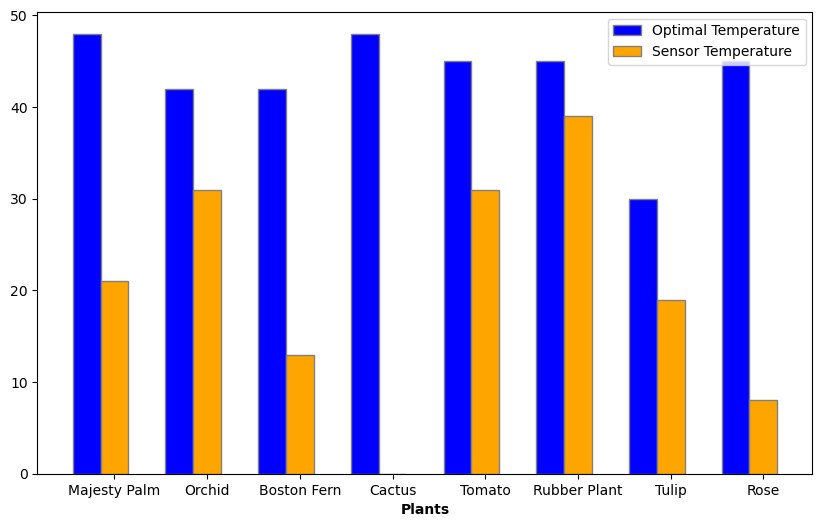

In [454]:
plt.figure(figsize=(10, 6))

barWidth = 0.3

bars1 = optimal_temperatures
bars2 = sensor_temperatures

r1 = range(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='grey', label='Optimal Temperature')
plt.bar(r2, bars2, color='orange', width=barWidth, edgecolor='grey', label='Sensor Temperature')

plt.xlabel('Plants', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], selected_plants)

plt.legend()
plt.show()

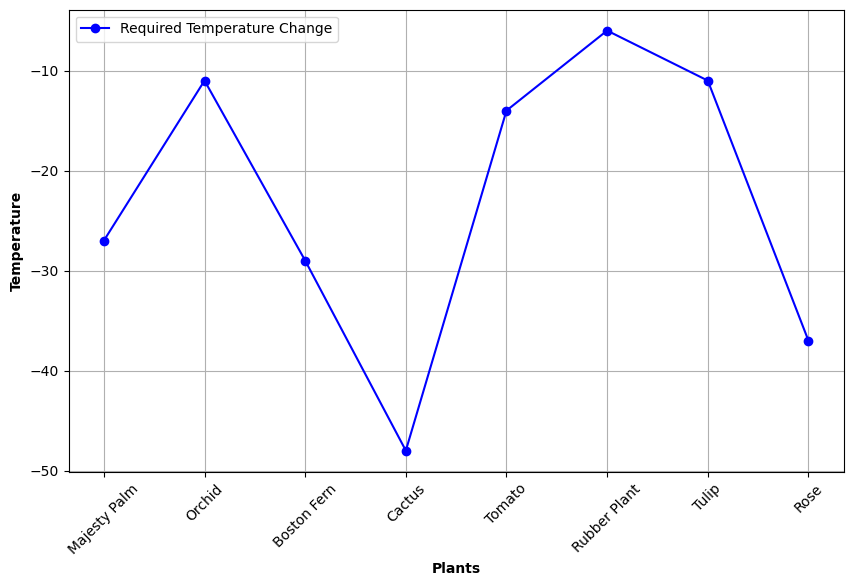

In [455]:
plt.figure(figsize=(10, 6))

plt.plot(selected_plants, required_changes, marker='o', color='blue', label='Required Temperature Change')

plt.xlabel('Plant Name', fontweight='bold')
plt.ylabel('Temperature', fontweight='bold')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [456]:
print("Required Humidity changes for each iteration:")
for i, (humidity_change) in enumerate(required_h_changes, 1):
    print(f"Iteration {i}: Humidity Change: {humidity_change}")

accuracy = sum(accurate_h_changes)/len(accurate_h_changes)
total_changes=0
print("Accuracy:",accuracy)

Required Humidity changes for each iteration:
Iteration 1: Humidity Change: 26
Iteration 2: Humidity Change: 39
Iteration 3: Humidity Change: 10
Iteration 4: Humidity Change: 16
Iteration 5: Humidity Change: 1
Iteration 6: Humidity Change: 22
Iteration 7: Humidity Change: 30
Iteration 8: Humidity Change: 24
Accuracy: 21.0


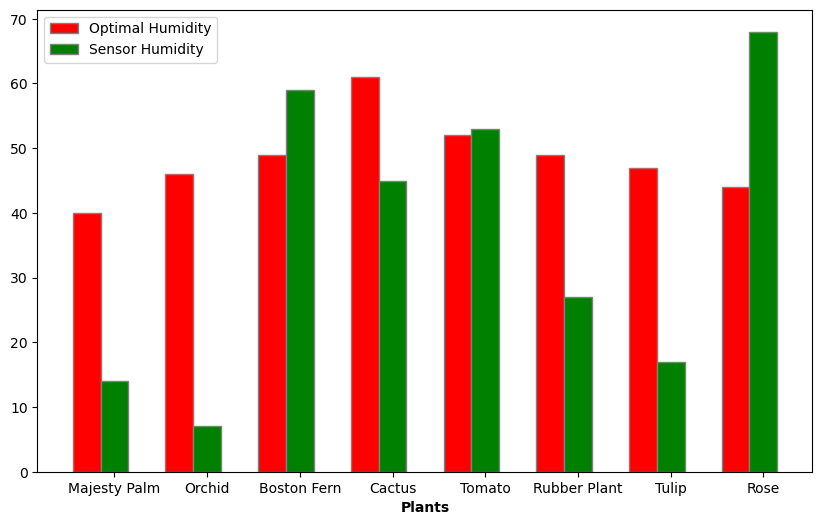

In [457]:
plt.figure(figsize=(10, 6))

barWidth = 0.3

bars1 = optimal_humidities
bars2 = sensor_humidities

r1 = range(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='grey', label='Optimal Humidity')
plt.bar(r2, bars2, color='green', width=barWidth, edgecolor='grey', label='Sensor Humidity')

plt.xlabel('Plants', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], selected_plants)

plt.legend()
plt.show()

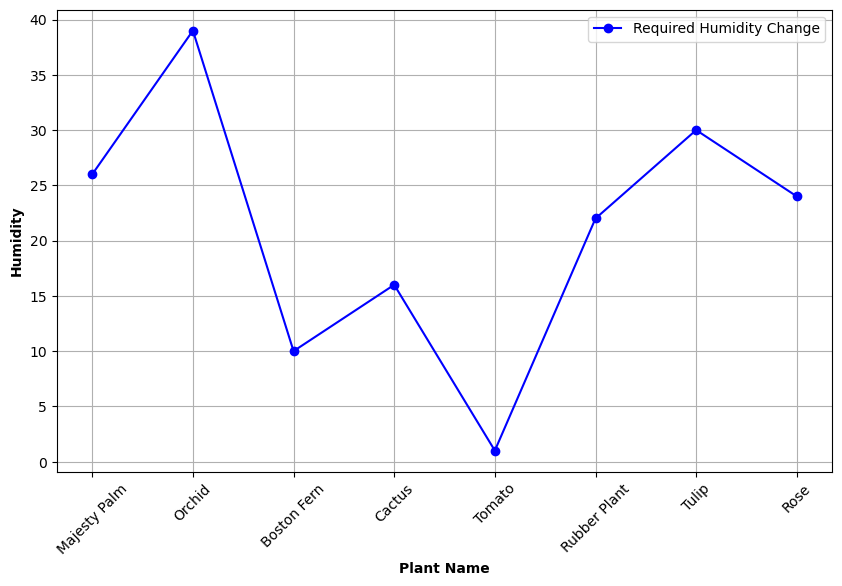

In [459]:
plt.figure(figsize=(10, 6))

plt.plot(selected_plants, required_h_changes, marker='o', color='blue', label='Required Humidity Change')

plt.xlabel('Plant Name', fontweight='bold')
plt.ylabel('Humidity', fontweight='bold')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

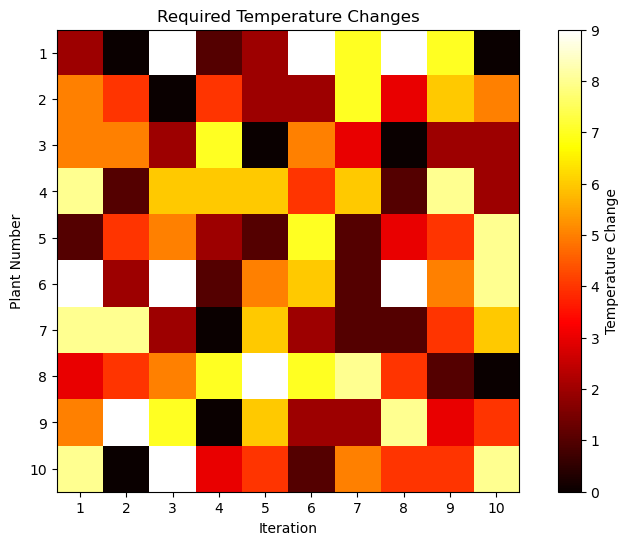

In [458]:
import numpy as np
import matplotlib.pyplot as plt

required_changes = np.random.randint(0, 10, size=(10, 10))

plt.figure(figsize=(10, 6))
plt.imshow(required_changes, cmap='hot', interpolation='nearest')
plt.colorbar(label='Temperature Change')
plt.title('Required Temperature Changes')
plt.xlabel('Iteration')
plt.ylabel('Plant Number')
plt.xticks(np.arange(required_changes.shape[1]), np.arange(1, required_changes.shape[1] + 1))
plt.yticks(np.arange(required_changes.shape[0]), np.arange(1, required_changes.shape[0] + 1))
plt.show()


Plant wise: comparison graph (actual temp, needed temperature)
Multiple plants (graph, actual, expected and variation)